# 1. 데이터

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!pip install factor_analyzer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.8/41.8 kB 2.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 202.8/202.8 kB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.8/98.8 kB 10.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 46.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.5/468.5 kB 24.2 MB/s eta 0:00:00
  Created wheel for factor_analyzer: filename=factor_analyzer-0.4.1-py2.py3-none-any.whl size=42014 sha256=281cc4dd5b8567abf92e2932dd250fe37150242f50fbee2b540937081ebeeb6f
  Stored in directory: /root/.cache/pip/wheels/c5/94/da/41abe415f64706710726291086a814dd8b9e0dab1c491ef6ed
Successfully built factor_analyzer


In [4]:
import pandas as pd 
import numpy as np
import seaborn as sns
from sklearn.decomposition import PCA

# 필요한 패키지/모듈 가져오기
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
%matplotlib inline

from factor_analyzer import FactorAnalyzer

In [5]:
data_2201 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DM/HW/우리잘했조_202201.csv', index_col = False)
data_2202 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DM/HW/우리잘했조_202202.csv', index_col = False)
data_2203 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DM/HW/우리잘했조_202203.csv', index_col = False)
data_2204 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DM/HW/우리잘했조_202204.csv', index_col = False)
data_2205 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DM/HW/우리잘했조_202205.csv', index_col = False)
data_2206 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DM/HW/우리잘했조_202206.csv', index_col = False)
data_2207 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DM/HW/우리잘했조_202207.csv', index_col = False)
data_2208 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DM/HW/우리잘했조_202208.csv', index_col = False)
data_2209 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DM/HW/우리잘했조_202209.csv', index_col = False)
data_2210 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DM/HW/우리잘했조_202210.csv', index_col = False)
data_2211 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DM/HW/우리잘했조_202211.csv', index_col = False)
data_2212 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DM/HW/우리잘했조_202212.csv', index_col = False)
# 1시간 단위 행정동 별 생활인구 1년치 데이터

In [6]:
data_list = [data_2201,data_2202,data_2203,data_2204,data_2205,data_2206,data_2207,data_2208,data_2209,data_2210,data_2211,data_2212]

In [7]:
#여러개의 데이터프레임 하나로 합치기기
data_22 = pd.concat(data_list, axis = 0)
data_22.reset_index(inplace = True , drop = True)

data_22 = pd.DataFrame(data_22)

In [8]:
data_22

,기준일ID,시간대구분,행정동코드,총생활인구수,남자0세부터9세생활인구수,남자10세부터14세생활인구수,남자15세부터19세생활인구수,남자20세부터24세생활인구수,남자25세부터29세생활인구수,남자30세부터34세생활인구수,...,여자25세부터29세생활인구수,여자30세부터34세생활인구수,여자35세부터39세생활인구수,여자40세부터44세생활인구수,여자45세부터49세생활인구수,여자50세부터54세생활인구수,여자55세부터59세생활인구수,여자60세부터64세생활인구수,여자65세부터69세생활인구수,여자70세이상생활인구수
0,20220101,0,11200550,15915.9153,255.4393,116.4503,356.6989,1515.4383,1407.4535,639.5899,...,1138.1167,506.7359,572.9357,342.8503,546.2349,393.6438,400.2660,414.5880,299.1094,871.5197
1,20220101,0,11320515,20067.0536,761.0144,364.8200,549.2125,597.7672,650.3921,666.1416,...,761.3329,684.2883,771.4230,752.9131,820.4530,782.0723,951.6618,914.5524,636.0850,1497.8745
2,20220101,0,11740590,13131.7376,814.6533,380.7626,444.0055,297.3462,341.0619,296.3934,...,314.2245,357.4321,615.6579,598.9586,610.3032,533.1886,436.0663,463.4412,284.7736,714.1822
3,20220101,0,11710642,27802.6396,536.2982,235.3147,509.3444,1001.5843,1363.8527,1721.8997,...,1475.7207,1726.6845,1671.2855,1286.8066,1070.2619,832.3977,783.1949,810.2889,549.8354,1327.1990
4,20220101,0,11470580,14398.2868,573.7967,294.0708,353.9354,357.5041,483.9943,525.4139,...,567.7996,458.1889,529.2853,502.2692,544.1017,485.4408,654.0012,600.3047,431.7909,1005.2701
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3714235,20221231,23,11740550,26849.5654,2351.0068,1214.8337,937.6079,456.3894,498.5714,472.1622,...,513.0224,561.7293,1099.6503,1217.8158,1274.9191,851.5014,816.0413,778.8732,640.6550,1236.6337
3714236,20221231,23,11590540,20025.0040,1031.9551,378.5519,384.2442,613.5671,790.2585,713.5261,...,746.3391,713.8543,1026.2784,819.3403,749.9114,689.6776,820.0387,676.9692,602.1882,1293.3497
3714237,20221231,23,11470630,16125.0930,526.2720,583.5859,839.0280,368.6007,365.4509,305.8051,...,359.1490,348.7186,485.3043,775.2054,876.9643,721.4776,639.9144,509.0424,404.5792,937.8374
3714238,20221231,23,11710540,14964.0371,658.0712,375.2026,330.4875,294.3431,351.6816,401.5746,...,372.0913,415.5257,593.9416,580.5089,608.0485,651.5841,633.4928,609.3532,509.4529,1173.0780


In [132]:
data_22_gr = data_22[data_22['행정동코드']==11305534 ]
# 개별 행정동 데이터 추출

In [133]:
data_22_gr_ = data_22_gr
data_22_gr_

,기준일ID,시간대구분,행정동코드,총생활인구수,남자0세부터9세생활인구수,남자10세부터14세생활인구수,남자15세부터19세생활인구수,남자20세부터24세생활인구수,남자25세부터29세생활인구수,남자30세부터34세생활인구수,...,여자25세부터29세생활인구수,여자30세부터34세생활인구수,여자35세부터39세생활인구수,여자40세부터44세생활인구수,여자45세부터49세생활인구수,여자50세부터54세생활인구수,여자55세부터59세생활인구수,여자60세부터64세생활인구수,여자65세부터69세생활인구수,여자70세이상생활인구수
181,20220101,0,11305534,26376.5654,971.2295,553.0482,783.7787,646.3068,837.9474,766.2130,...,767.2774,753.4954,1004.4702,850.2644,1125.9659,1017.6607,1073.0177,1019.3979,882.5987,2390.0174
715,20220101,1,11305534,26565.5703,931.6154,530.4904,775.1630,690.7418,866.8357,791.7829,...,782.8948,772.0018,1007.7768,865.8281,1119.8135,1027.8130,1063.0841,1023.9640,890.8275,2412.0715
1042,20220101,2,11305534,26646.0019,905.8701,515.8306,788.5568,693.3305,847.7291,773.6407,...,814.3428,767.9373,1011.3802,868.8132,1143.7389,1045.1490,1068.1117,1035.8938,898.3372,2420.3741
1516,20220101,3,11305534,26638.0253,917.7851,522.6148,806.5595,721.1989,830.7997,788.7365,...,807.9991,789.5530,1013.5422,852.1869,1114.5477,1042.9930,1077.9625,1023.3577,906.1776,2384.4582
2072,20220101,4,11305534,26699.0762,899.0139,511.9261,796.5885,720.6091,831.5172,791.7984,...,827.7949,763.5632,1014.5176,858.5925,1136.5537,1049.0288,1088.8755,1019.0124,902.0572,2401.7544
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3712440,20221231,19,11305534,22120.9898,696.2717,396.4786,691.7358,610.6877,703.4462,548.1970,...,585.0563,629.1548,836.4122,698.2238,943.2793,887.2109,919.8871,860.6022,694.4547,2149.3405
3712624,20221231,20,11305534,23144.8680,750.9278,427.6012,759.0716,613.8029,687.0433,611.9281,...,609.5238,683.7193,854.6705,744.8570,979.9450,900.1440,963.4154,916.3193,730.4062,2217.2230
3713076,20221231,21,11305534,23431.1878,753.3369,428.9730,709.6839,651.9594,694.3556,614.3260,...,699.9538,666.4126,847.5648,798.4049,957.8578,942.4062,982.8375,860.8145,737.2696,2230.1350
3713757,20221231,22,11305534,24603.9131,892.5078,508.2215,688.5531,667.4235,733.0263,626.4515,...,737.4383,703.8903,863.4124,848.8208,989.2553,1012.7325,1075.7684,930.2106,755.9193,2332.7851


In [134]:
data_22_gr = data_22_gr[['기준일ID', '시간대구분', '여자60세부터64세생활인구수', '여자65세부터69세생활인구수', '남자60세부터64세생활인구수', '남자65세부터69세생활인구수', '남자70세이상생활인구수', '여자70세이상생활인구수']]

data_22_gr['60세이상생활인구수'] = data_22_gr['남자70세이상생활인구수'] + data_22_gr['여자60세부터64세생활인구수']+ data_22_gr['여자65세부터69세생활인구수']+ data_22_gr['남자60세부터64세생활인구수']+ data_22_gr['남자65세부터69세생활인구수']+ data_22_gr['여자70세이상생활인구수']



<ipython-input-134-0160ed5650cd>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_22_gr['60세이상생활인구수'] = data_22_gr['남자70세이상생활인구수'] + data_22_gr['여자60세부터64세생활인구수']+ data_22_gr['여자65세부터69세생활인구수']+ data_22_gr['남자60세부터64세생활인구수']+ data_22_gr['남자65세부터69세생활인구수']+ data_22_gr['여자70세이상생활인구수']


In [135]:
data_22_gr['60세이상생활인구수'] = data_22_gr['남자70세이상생활인구수'] + data_22_gr['여자60세부터64세생활인구수']+ data_22_gr['여자65세부터69세생활인구수']+ data_22_gr['남자60세부터64세생활인구수']+ data_22_gr['남자65세부터69세생활인구수']+ data_22_gr['여자70세이상생활인구수']

columns_to_drop = ['여자60세부터64세생활인구수','여자65세부터69세생활인구수','남자60세부터64세생활인구수','남자65세부터69세생활인구수','남자70세이상생활인구수','여자70세이상생활인구수']

<ipython-input-135-4ccd9b762ae5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_22_gr['60세이상생활인구수'] = data_22_gr['남자70세이상생활인구수'] + data_22_gr['여자60세부터64세생활인구수']+ data_22_gr['여자65세부터69세생활인구수']+ data_22_gr['남자60세부터64세생활인구수']+ data_22_gr['남자65세부터69세생활인구수']+ data_22_gr['여자70세이상생활인구수']


In [136]:
data_22_gr

,기준일ID,시간대구분,여자60세부터64세생활인구수,여자65세부터69세생활인구수,남자60세부터64세생활인구수,남자65세부터69세생활인구수,남자70세이상생활인구수,여자70세이상생활인구수,60세이상생활인구수
181,20220101,0,1019.3979,882.5987,821.7724,674.7189,1614.8562,2390.0174,7403.3615
715,20220101,1,1023.9640,890.8275,820.1542,693.3373,1625.1987,2412.0715,7465.5532
1042,20220101,2,1035.8938,898.3372,851.6411,674.9150,1622.9219,2420.3741,7504.0831
1516,20220101,3,1023.3577,906.1776,836.9646,672.3893,1623.3679,2384.4582,7446.7153
2072,20220101,4,1019.0124,902.0572,850.1165,661.1902,1645.9092,2401.7544,7480.0399
...,...,...,...,...,...,...,...,...,...
3712440,20221231,19,860.6022,694.4547,710.3917,503.3666,1449.4772,2149.3405,6367.6329
3712624,20221231,20,916.3193,730.4062,751.0952,546.4325,1494.8944,2217.2230,6656.3706
3713076,20221231,21,860.8145,737.2696,744.2831,553.5109,1524.6301,2230.1350,6650.6432
3713757,20221231,22,930.2106,755.9193,800.6409,548.5176,1519.3993,2332.7851,6887.4728


In [137]:
data_22_gr = pd.DataFrame(data_22_gr)

# 기준일ID와 시간대구분을 기준으로 피벗 테이블 생성
pivot_22_gr = data_22_gr.pivot(index='기준일ID', columns='시간대구분', values='60세이상생활인구수')

In [138]:
pivot_22_gr

시간대구분,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
기준일ID,,,,,,,,,,,,,,,,,,,,,
20220101,7403.3615,7465.5532,7504.0831,7446.7153,7480.0399,7456.0350,7391.5397,7427.6233,7289.4894,7210.2586,...,6626.7274,6633.1826,6816.0834,7016.1928,7107.4148,7275.5369,7459.8654,7519.6289,7493.8222,7536.2102
20220102,7526.6104,7529.7765,7552.8606,7537.6773,7568.9470,7558.9604,7487.0044,7441.6820,7399.7496,7194.7009,...,6442.3445,6541.0933,6841.5104,7025.9135,7238.2456,7586.0212,7586.3806,7725.2742,7639.9026,7538.7841
20220103,7587.5120,7577.8838,7557.8864,7554.1953,7461.5143,7287.5332,7070.7249,6883.6056,6572.6264,6312.4748,...,5914.6975,6052.9517,6286.1217,6641.1201,7018.0494,7254.3136,7310.1924,7492.9851,7651.7549,7432.7728
20220104,7488.3141,7506.0463,7512.1805,7519.4663,7453.0571,7263.2811,7184.7458,7036.0897,6682.7289,6534.4039,...,5855.0652,6066.7466,6374.8195,6629.8882,6973.1747,7120.6739,7267.9679,7432.7436,7482.1786,7278.4069
20220105,7369.1145,7417.3898,7407.7466,7437.6648,7310.7816,7198.4611,6952.7939,6739.6403,6617.4114,6413.0717,...,5909.9301,6070.2844,6368.5070,6668.6423,7020.1455,7227.4185,7254.0513,7483.2130,7507.7360,7375.0243
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20221227,7074.5759,7050.1329,7051.4513,7048.6723,7085.9371,6905.6319,6797.5004,6449.8150,6244.1256,5959.8065,...,5431.2648,5546.0368,5738.5569,6065.8547,6439.1262,6509.6185,6766.2758,6821.4021,6973.7814,6992.8987
20221228,7075.2177,7117.2857,7108.5238,7102.2438,7062.7186,6874.5843,6700.4303,6526.4939,6267.6329,5992.6772,...,5364.5578,5641.9531,5948.8727,6135.6059,6448.2347,6628.3593,6658.4096,6908.3057,7123.5509,7020.8689
20221229,7071.0771,7132.8108,7101.2608,7093.5630,7122.3619,6965.0778,6803.9822,6580.1249,6318.2660,5883.4349,...,5292.9667,5693.6285,5821.8298,5937.7365,6271.2364,6357.2331,6525.5125,6747.4916,6909.3226,6963.1277


# 2. FA

##Step1. 데이터 전처리

In [139]:
# 열별로 scaling (z-standardization)
from sklearn.preprocessing import StandardScaler
data_scale = pd.DataFrame(StandardScaler().fit_transform(pivot_22_gr), columns=pivot_22_gr.columns, index = pivot_22_gr.index)

In [140]:
data_scale

시간대구분,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
기준일ID,,,,,,,,,,,,,,,,,,,,,
20220101,0.688844,0.728206,0.837914,0.567050,0.967438,1.583332,1.819681,2.192518,2.097777,2.410101,...,2.543171,2.260201,2.238428,2.306832,1.704067,1.661943,1.892112,1.745030,1.358483,1.402548
20220102,1.229685,0.983704,1.033491,0.955106,1.361752,2.020537,2.184037,2.239476,2.399463,2.371242,...,2.038736,1.992291,2.314253,2.337885,2.123430,2.695661,2.333105,2.495928,1.915121,1.414124
20220103,1.496934,1.175088,1.053642,1.025574,0.885274,0.867572,0.595243,0.375428,0.136348,0.167641,...,0.595198,0.572170,0.658039,1.108669,1.417617,1.591282,1.370399,1.647742,1.960284,0.937332
20220104,1.061633,0.889299,0.870381,0.877416,0.847765,0.764554,1.030421,0.884745,0.437602,0.721970,...,0.432056,0.612303,0.922543,1.072788,1.273777,1.146346,1.223218,1.427774,1.314115,0.243063
20220105,0.538561,0.536599,0.451646,0.528440,0.216755,0.489213,0.145142,-0.105435,0.258885,0.418909,...,0.582156,0.622595,0.903719,1.196588,1.424336,1.501738,1.174709,1.612060,1.411501,0.677605
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20221227,-0.753935,-0.924449,-0.976944,-1.131054,-0.780460,-0.754663,-0.447559,-1.073489,-0.762472,-0.713244,...,-0.727378,-0.902567,-0.974843,-0.729007,-0.438051,-0.888086,-0.525523,-0.804494,-0.623126,-1.041025
20221228,-0.751119,-0.657297,-0.748108,-0.902511,-0.883437,-0.886547,-0.818042,-0.817371,-0.698153,-0.631141,...,-0.909875,-0.623524,-0.347664,-0.506188,-0.408855,-0.492754,-0.901511,-0.487172,-0.052431,-0.915228
20221229,-0.769289,-0.595534,-0.777229,-0.939545,-0.618911,-0.502150,-0.422820,-0.638237,-0.559615,-0.904003,...,-1.105734,-0.473187,-0.726516,-1.138279,-0.976202,-1.395434,-1.364748,-1.074373,-0.868745,-1.174922


In [141]:
#z-표준화한 결과의 평균
data_scale.mean(axis=0).head()

시간대구분
0   -1.255982e-14
1   -7.332643e-15
2   -4.651987e-15
3    6.517313e-15
4    7.539783e-15
dtype: float64

In [142]:
data_scale.cov() # 공분산행렬 구하기

시간대구분,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
시간대구분,,,,,,,,,,,,,,,,,,,,,
0,1.002747,0.879371,0.886312,0.879149,0.849121,0.799293,0.748831,0.667846,0.598009,0.610730,...,0.645964,0.708857,0.768865,0.799178,0.808930,0.806545,0.814398,0.846840,0.861439,0.867918
1,0.879371,1.002747,0.988081,0.980924,0.932890,0.868556,0.781729,0.669714,0.583096,0.578660,...,0.592651,0.643859,0.694463,0.725588,0.730478,0.727265,0.735090,0.770316,0.781890,0.777784
2,0.886312,0.988081,1.002747,0.988188,0.942009,0.875979,0.794564,0.681110,0.594721,0.588839,...,0.600901,0.651526,0.702970,0.731098,0.736066,0.732699,0.741995,0.776711,0.790312,0.791663
3,0.879149,0.980924,0.988188,1.002747,0.954984,0.891001,0.809325,0.696924,0.610360,0.604696,...,0.607132,0.652203,0.698429,0.723236,0.729377,0.727801,0.739570,0.770166,0.783569,0.793048
4,0.849121,0.932890,0.942009,0.954984,1.002747,0.959683,0.909008,0.823587,0.753177,0.741715,...,0.706754,0.732639,0.751832,0.751533,0.744991,0.757877,0.783557,0.787368,0.794625,0.829792
5,0.799293,0.868556,0.875979,0.891001,0.959683,1.002747,0.964212,0.906301,0.851801,0.832990,...,0.777315,0.785337,0.789031,0.771300,0.753222,0.775852,0.804480,0.786976,0.781451,0.818772
6,0.748831,0.781729,0.794564,0.809325,0.909008,0.964212,1.002747,0.958489,0.916459,0.901592,...,0.833789,0.829352,0.817613,0.780994,0.745515,0.766513,0.805092,0.769650,0.767633,0.817220
7,0.667846,0.669714,0.681110,0.696924,0.823587,0.906301,0.958489,1.002747,0.969844,0.955790,...,0.877607,0.854844,0.824028,0.761619,0.727259,0.757584,0.796164,0.745683,0.729770,0.787753
8,0.598009,0.583096,0.594721,0.610360,0.753177,0.851801,0.916459,0.969844,1.002747,0.975264,...,0.881684,0.853065,0.807732,0.735614,0.698030,0.733809,0.772923,0.708545,0.692401,0.757095


##Step2. 요인 분석 전 검정 

In [143]:
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all, kmo_model = calculate_kmo(data_scale)
kmo_model # 0.8 이상이므로 꽤 좋음

/usr/local/lib/python3.10/dist-packages/factor_analyzer/utils.py:244: UserWarning: The inverse of the variance-covariance matrix was calculated using the Moore-Penrose generalized matrix inversion, due to its determinant being at or very close to zero.
  warnings.warn(


0.9713972221677601

In [144]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value, p_value = calculate_bartlett_sphericity(data_scale)
chi_square_value, p_value # p-value < 0.05 --> 귀무가설 기각

(22741.875923972762, 0.0)

In [145]:
# Eigen value
fa = FactorAnalyzer(n_factors=data_scale.shape[1], rotation=None) # rotation: 
fa.fit(data_scale)

ev, v = fa.get_eigenvalues()
print('eigen value:', ev,'\n', "number of eigen value:", len(ev))

print('적합한 PC 개수:', sum(ev >= 1))

eigen value: [1.95075110e+01 2.04480707e+00 1.15232248e+00 3.16134600e-01
 1.98119245e-01 1.19817745e-01 9.93599228e-02 8.72446092e-02
 6.87111191e-02 5.88372483e-02 4.66772020e-02 3.50624038e-02
 3.32289802e-02 3.10033868e-02 2.86471684e-02 2.61317276e-02
 2.41130177e-02 2.28088239e-02 2.07711282e-02 1.90707713e-02
 1.78904147e-02 1.56551789e-02 1.47870370e-02 1.12876727e-02] 
 number of eigen value: 24
적합한 PC 개수: 3


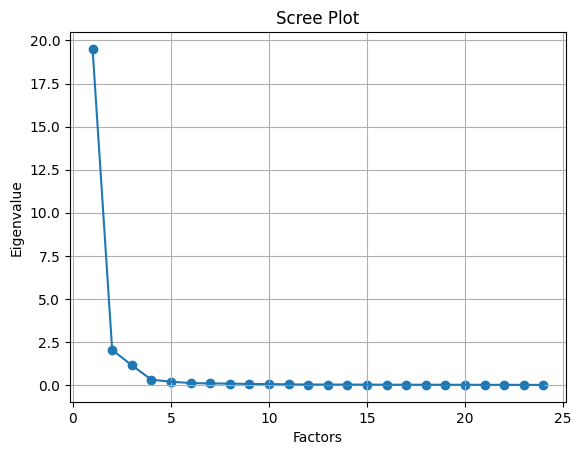

In [146]:
# 시각화 1
plt.scatter(range(1, data_scale.shape[1]+1),ev)
plt.plot(range(1,data_scale.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

##Step3. Factor Analysis

###Factor : 3

In [147]:
fa = FactorAnalyzer(n_factors=3, rotation = "promax")
fa.fit(data_scale)

FactorAnalyzer(rotation_kwargs={})

In [148]:
# Factor Analysis가 적용된 dataset (scaled)
X_f = fa.fit_transform(data_scale)
X_ff = pd.DataFrame(X_f[:,:4], 
                    columns = ['Factor1','Factor2','Factor3'], 
                    index = data_scale.index)
X_ff

,Factor1,Factor2,Factor3
기준일ID,,,
20220101,2.436992,1.858882,0.667949
20220102,2.469131,2.253437,1.093552
20220103,0.266041,1.492745,1.059638
20220104,0.496176,1.158120,0.948129
20220105,0.243645,1.451049,0.391413
...,...,...,...
20221227,-0.775242,-0.692870,-0.932620
20221228,-0.746134,-0.458834,-0.813305
20221229,-0.788074,-1.185806,-0.680197


<Axes: ylabel='시간대구분'>

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 44036 (\N{HANGUL SYLLABLE GAN}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 45824 (\N{HANGUL SYLLABLE DAE}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 44396 (\N{HANGUL SYLLABLE GU}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 48516 (\N{HANGUL SYLLABLE BUN}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from current font.
  fig.ca

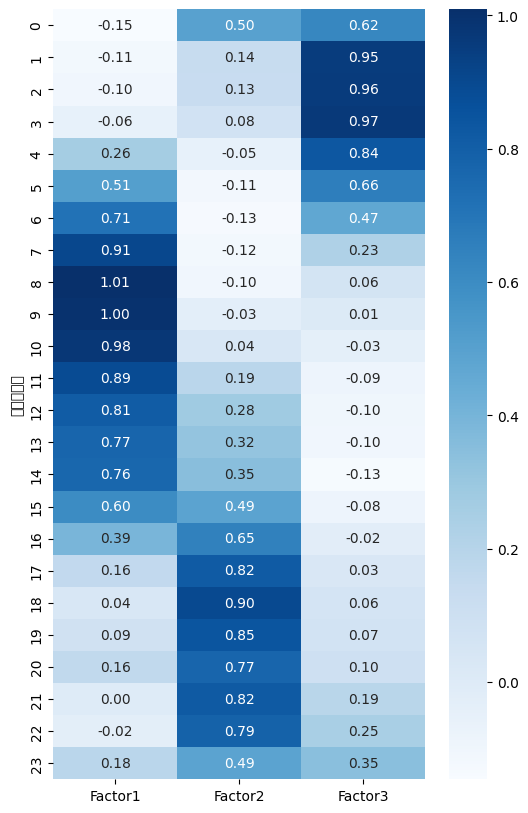

In [149]:
# 시각화 1)
fa_result_loading = pd.DataFrame(fa.loadings_, 
                                 columns = ['Factor1', 'Factor2', 'Factor3'],
                                 index=data_scale.columns)
plt.figure(figsize=(6,10))
sns.heatmap(fa_result_loading, cmap="Blues", annot=True, fmt='.2f')

<Axes: ylabel='시간대구분'>

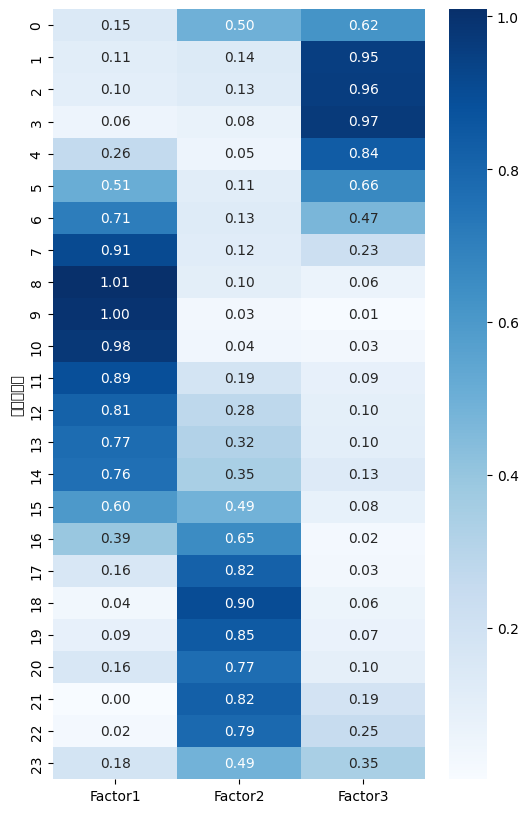

In [150]:
# 시각화 2) 절대값
plt.figure(figsize=(6,10))
sns.heatmap(np.abs(fa_result_loading), cmap="Blues", annot=True, fmt='.2f')

#3. Clustering


In [151]:
from sklearn.preprocessing import StandardScaler
scaled = StandardScaler().fit_transform(X_ff)
scaled = pd.DataFrame(scaled, columns = X_ff.columns)
scaled.describe() # 기초통계량

,Factor1,Factor2,Factor3
count,365.000000,3.650000e+02,3.650000e+02
mean,0.000000,-7.786770e-17,-1.557354e-16
std,1.001373,1.001373e+00,1.001373e+00
min,-1.726572,-2.135677e+00,-2.039962e+00
25%,-0.778084,-7.728846e-01,-8.382600e-01
50%,-0.125754,-5.794888e-02,-5.591861e-02
75%,0.520757,7.586025e-01,7.144513e-01
max,3.381843,2.884270e+00,5.369358e+00


##Ward's linkage method

### Step 1. 거리 계산에 따른 클러스터링


In [152]:
data_prime = scaled.copy()

In [153]:
# used ward's linkeage
# used euclidean distance
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
clusters = linkage(y=data_prime, method='ward', metric='euclidean')

### Step 2. 군집 수 결정

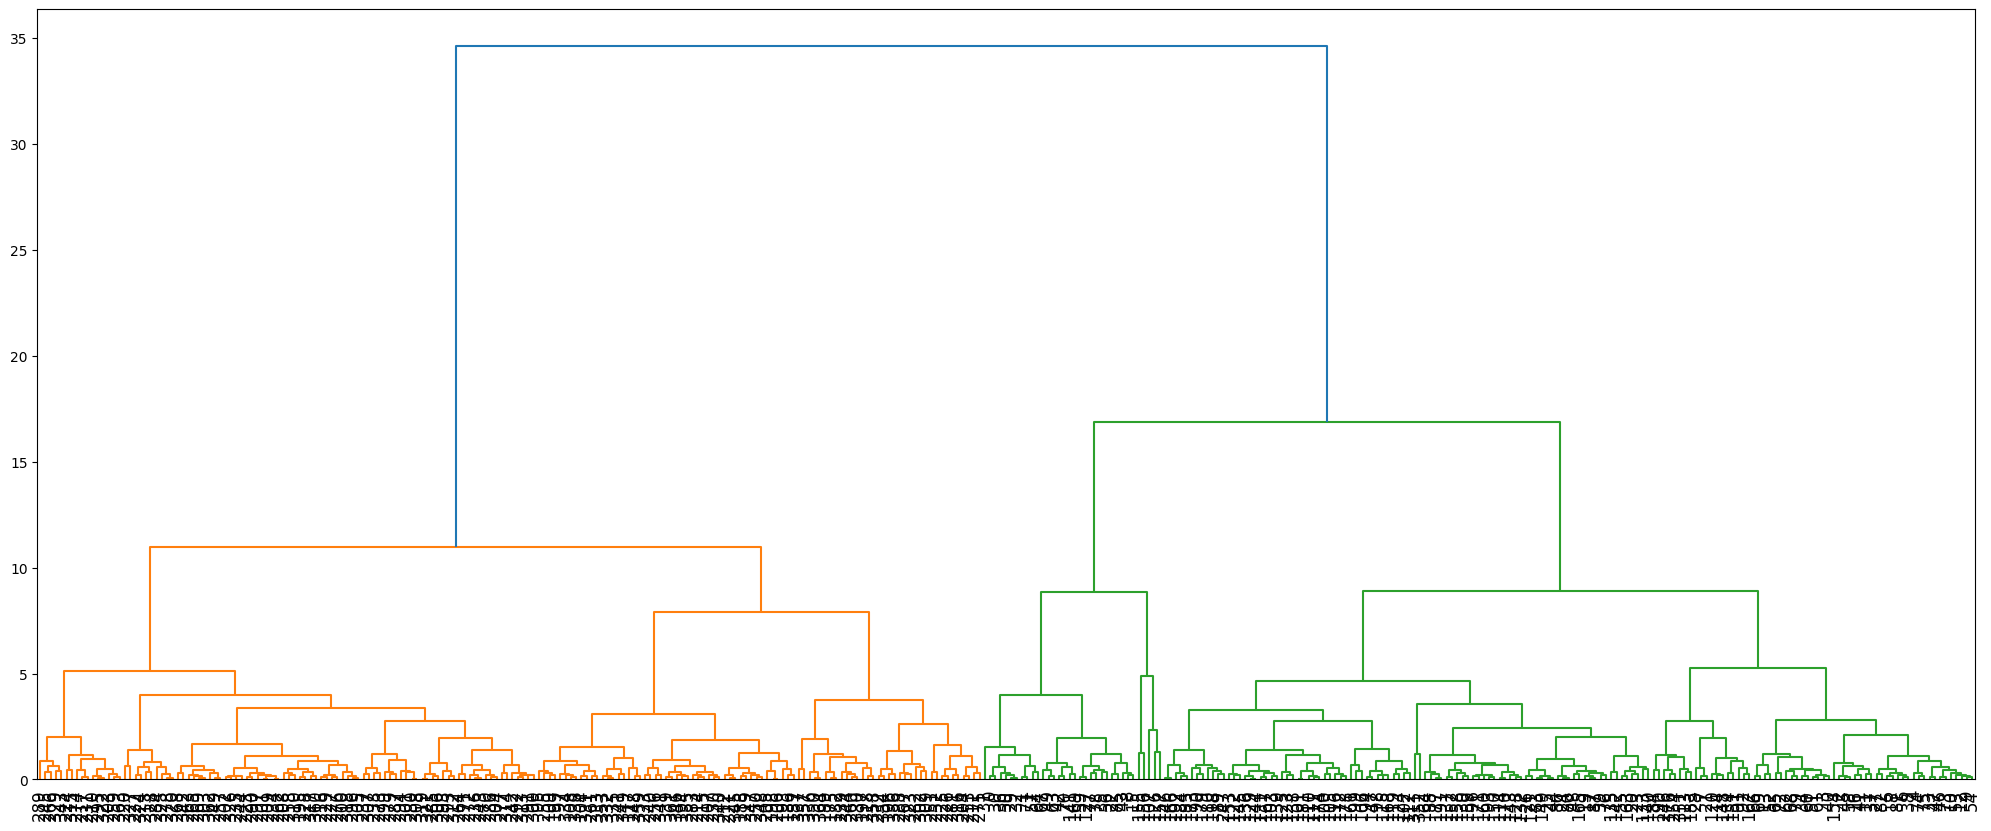

In [154]:
import matplotlib.pyplot as plt
plt.figure( figsize = (25, 10) )
dendrogram(clusters, leaf_rotation=90, leaf_font_size=12,)
plt.show()

In [155]:
cut_tree = fcluster(clusters, t=15, criterion='distance')
cut_tree

array([2, 2, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3,
       2, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 3, 3, 2, 2, 3, 3, 3, 3, 3, 2, 2,
       3, 3, 3, 3, 3, 2, 2, 3, 3, 3, 3, 3, 2, 2, 3, 2, 3, 3, 3, 2, 2, 3,
       3, 2, 3, 3, 2, 2, 3, 3, 3, 3, 3, 2, 2, 3, 3, 3, 3, 3, 3, 2, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 1, 3, 1, 3, 3, 3, 3, 3, 3, 1, 3, 3, 2, 1, 1,
       3, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 1,
       3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 1, 1, 1, 1, 3, 3, 3, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 3, 3, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [156]:
pd.Series(cut_tree).value_counts()

1    178
3    153
2     34
dtype: int64

### Step 3. Evaluation

In [157]:
from sklearn.metrics import silhouette_samples, silhouette_score
score_samples = silhouette_samples(data_prime, cut_tree)
print('Silhouette Score:', score_samples[:5], '\nSilhouette Score shape:', score_samples.shape, '\n')

average_score = silhouette_score(data_prime, cut_tree)
# np.mean(score_samples) == average_score: True
print('Silhouette Average Score:{0:.3f}'.format(average_score))

Silhouette Score: [0.50773044 0.54117682 0.44844029 0.51424365 0.52006873] 
Silhouette Score shape: (365,) 

Silhouette Average Score:0.448


In [158]:
fa_result_loading.index

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23],
           dtype='int64', name='시간대구분')

In [159]:
data_prime['hc_cluster'] = cut_tree
data_prime['silhouette_coeff'] = score_samples
data_prime['date'] = X_ff.index
data_prime

,Factor1,Factor2,Factor3,hc_cluster,silhouette_coeff,date
0,2.444395,1.870108,0.670437,2,0.507730,20220101
1,2.476631,2.267047,1.097625,2,0.541177,20220102
2,0.266849,1.501760,1.063585,3,0.448440,20220103
3,0.497683,1.165115,0.951660,3,0.514244,20220104
4,0.244385,1.459813,0.392871,3,0.520069,20220105
...,...,...,...,...,...,...
360,-0.777597,-0.697054,-0.936094,1,0.618325,20221227
361,-0.748401,-0.461605,-0.816334,1,0.560656,20221228
362,-0.790468,-1.192967,-0.682731,1,0.618370,20221229
363,-0.387198,-1.137338,-0.824793,1,0.592363,20221230


In [160]:
# 군집별 평균 silhouette_score 값
print(data_prime.groupby('hc_cluster')['silhouette_coeff'].mean())
print('표준편차:', data_prime.groupby('hc_cluster')['silhouette_coeff'].mean().std())

hc_cluster
1    0.457959
2    0.385628
3    0.449180
Name: silhouette_coeff, dtype: float64
표준편차: 0.03947097281434722


In [161]:
cluster_g = data_prime.groupby('hc_cluster')

In [162]:
# 군집별 통계(평균)
cluster_g.mean()

,Factor1,Factor2,Factor3,silhouette_coeff,date
hc_cluster,,,,,
1,-0.627428,-0.811120,-0.821173,0.457959,2.022095e+07
2,2.112681,1.555495,1.502976,0.385628,2.022030e+07
3,0.260464,0.597991,0.621357,0.449180,2.022042e+07


In [163]:
# 군집별 통계(표준편차)
cluster_g.std()

,Factor1,Factor2,Factor3,silhouette_coeff,date
hc_cluster,,,,,
1,0.687459,0.529569,0.443005,0.197978,194.277072
2,0.567812,0.711067,1.133231,0.171518,160.315256
3,0.503290,0.541624,0.458686,0.160199,221.706770


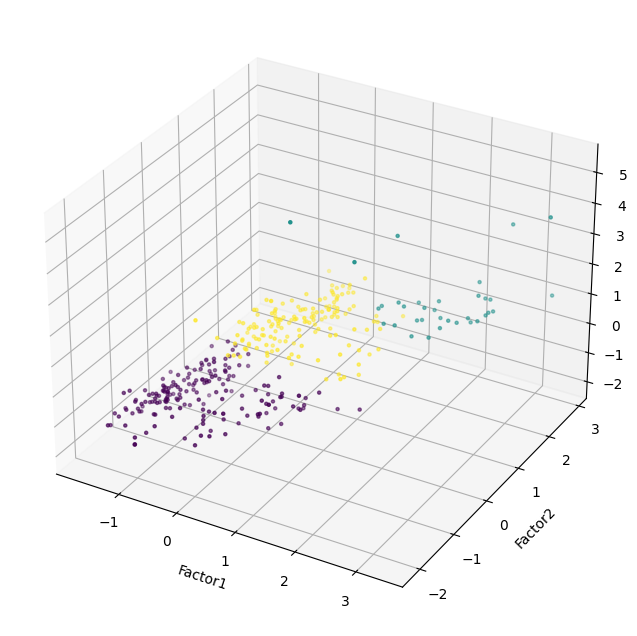

In [164]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(data_prime['Factor1'], data_prime['Factor2'], data_prime['Factor3'], s=5, c = data_prime['hc_cluster'])
ax.set_xlabel('Factor1', rotation=150)
ax.set_ylabel('Factor2')
ax.set_zlabel(r'Factor3', rotation=60)
plt.show()

In [165]:
cluster1 = data_prime[data_prime['hc_cluster'] == 1]
cluster2 = data_prime[data_prime['hc_cluster'] == 2]
cluster3 = data_prime[data_prime['hc_cluster'] == 3]

In [166]:
cluster1

,Factor1,Factor2,Factor3,hc_cluster,silhouette_coeff,date
95,-0.649835,-0.010942,0.154302,1,-0.103851,20220406
97,-0.414092,-0.461326,-0.270309,1,0.339190,20220408
104,-0.634749,-0.426792,0.004358,1,0.230933,20220415
108,-0.455352,-0.293200,-0.331200,1,0.306770,20220419
109,-0.536681,-0.057910,-0.015136,1,-0.006051,20220420
...,...,...,...,...,...,...
360,-0.777597,-0.697054,-0.936094,1,0.618325,20221227
361,-0.748401,-0.461605,-0.816334,1,0.560656,20221228
362,-0.790468,-1.192967,-0.682731,1,0.618370,20221229
363,-0.387198,-1.137338,-0.824793,1,0.592363,20221230


In [167]:
cluster2

,Factor1,Factor2,Factor3,hc_cluster,silhouette_coeff,date
0,2.444395,1.870108,0.670437,2,0.507730,20220101
1,2.476631,2.267047,1.097625,2,0.541177,20220102
8,2.300671,1.427155,1.084567,2,0.526659,20220109
15,2.239219,1.286588,0.943313,2,0.479009,20220116
22,2.166210,1.074522,0.796690,2,0.382694,20220123
29,2.699205,1.942765,1.063855,2,0.563026,20220130
30,2.416122,1.834517,0.828609,2,0.537844,20220131
31,3.281979,2.884270,1.040296,2,0.452390,20220201
32,2.685357,1.883480,1.025366,2,0.561841,20220202
35,1.934629,1.808315,1.154100,2,0.494135,20220205


In [168]:
cluster3

,Factor1,Factor2,Factor3,hc_cluster,silhouette_coeff,date
2,0.266849,1.501760,1.063585,3,0.448440,20220103
3,0.497683,1.165115,0.951660,3,0.514244,20220104
4,0.244385,1.459813,0.392871,3,0.520069,20220105
5,0.252658,0.770286,0.564022,3,0.663693,20220106
6,0.261717,0.968451,0.544099,3,0.643108,20220107
...,...,...,...,...,...,...
247,-0.177425,0.498692,-0.226904,3,0.290704,20220905
254,0.923683,0.207974,-0.430207,3,0.252943,20220912
311,-0.584910,-0.981853,1.863163,3,0.185670,20221108
351,1.346665,-0.100777,0.141363,3,0.342651,20221218


# 시각화

In [169]:
pivot_22_itw = data_22_gr.pivot(index='기준일ID', columns='시간대구분', values='60세이상생활인구수')

In [170]:
pivot_22_itw

시간대구분,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
기준일ID,,,,,,,,,,,,,,,,,,,,,
20220101,7403.3615,7465.5532,7504.0831,7446.7153,7480.0399,7456.0350,7391.5397,7427.6233,7289.4894,7210.2586,...,6626.7274,6633.1826,6816.0834,7016.1928,7107.4148,7275.5369,7459.8654,7519.6289,7493.8222,7536.2102
20220102,7526.6104,7529.7765,7552.8606,7537.6773,7568.9470,7558.9604,7487.0044,7441.6820,7399.7496,7194.7009,...,6442.3445,6541.0933,6841.5104,7025.9135,7238.2456,7586.0212,7586.3806,7725.2742,7639.9026,7538.7841
20220103,7587.5120,7577.8838,7557.8864,7554.1953,7461.5143,7287.5332,7070.7249,6883.6056,6572.6264,6312.4748,...,5914.6975,6052.9517,6286.1217,6641.1201,7018.0494,7254.3136,7310.1924,7492.9851,7651.7549,7432.7728
20220104,7488.3141,7506.0463,7512.1805,7519.4663,7453.0571,7263.2811,7184.7458,7036.0897,6682.7289,6534.4039,...,5855.0652,6066.7466,6374.8195,6629.8882,6973.1747,7120.6739,7267.9679,7432.7436,7482.1786,7278.4069
20220105,7369.1145,7417.3898,7407.7466,7437.6648,7310.7816,7198.4611,6952.7939,6739.6403,6617.4114,6413.0717,...,5909.9301,6070.2844,6368.5070,6668.6423,7020.1455,7227.4185,7254.0513,7483.2130,7507.7360,7375.0243
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20221227,7074.5759,7050.1329,7051.4513,7048.6723,7085.9371,6905.6319,6797.5004,6449.8150,6244.1256,5959.8065,...,5431.2648,5546.0368,5738.5569,6065.8547,6439.1262,6509.6185,6766.2758,6821.4021,6973.7814,6992.8987
20221228,7075.2177,7117.2857,7108.5238,7102.2438,7062.7186,6874.5843,6700.4303,6526.4939,6267.6329,5992.6772,...,5364.5578,5641.9531,5948.8727,6135.6059,6448.2347,6628.3593,6658.4096,6908.3057,7123.5509,7020.8689
20221229,7071.0771,7132.8108,7101.2608,7093.5630,7122.3619,6965.0778,6803.9822,6580.1249,6318.2660,5883.4349,...,5292.9667,5693.6285,5821.8298,5937.7365,6271.2364,6357.2331,6525.5125,6747.4916,6909.3226,6963.1277


## cluster1~3


In [171]:
cluster1

,Factor1,Factor2,Factor3,hc_cluster,silhouette_coeff,date
95,-0.649835,-0.010942,0.154302,1,-0.103851,20220406
97,-0.414092,-0.461326,-0.270309,1,0.339190,20220408
104,-0.634749,-0.426792,0.004358,1,0.230933,20220415
108,-0.455352,-0.293200,-0.331200,1,0.306770,20220419
109,-0.536681,-0.057910,-0.015136,1,-0.006051,20220420
...,...,...,...,...,...,...
360,-0.777597,-0.697054,-0.936094,1,0.618325,20221227
361,-0.748401,-0.461605,-0.816334,1,0.560656,20221228
362,-0.790468,-1.192967,-0.682731,1,0.618370,20221229
363,-0.387198,-1.137338,-0.824793,1,0.592363,20221230


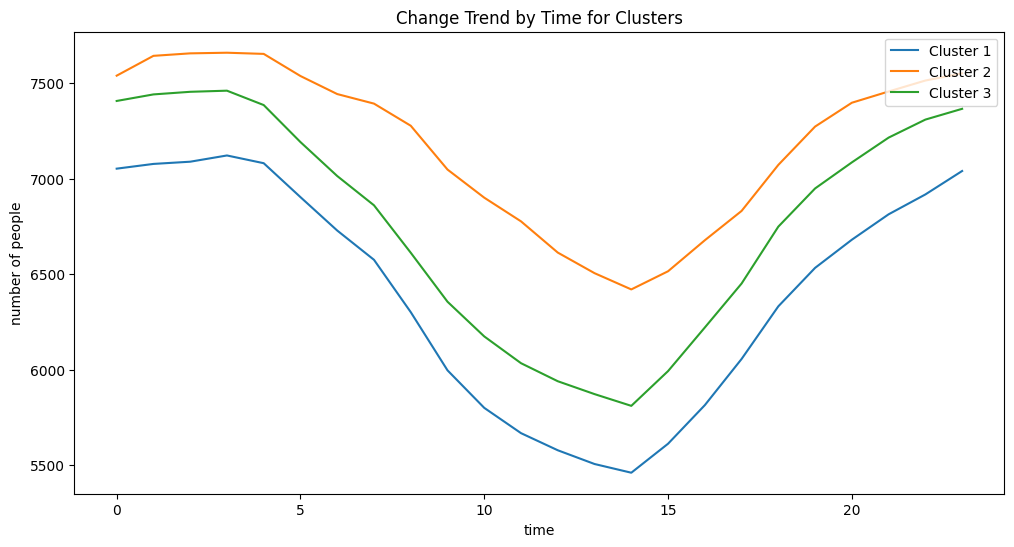

In [172]:
import matplotlib.pyplot as plt

time_range = range(24)

#cluster1부터 3까지의 데이터와 날짜들 추출
clusters = [cluster1, cluster2, cluster3]
cluster_labels = ['Cluster 1', 'Cluster 2', 'Cluster 3']
cluster_dates = [cluster['date'] for cluster in clusters]
cluster_data = [pivot_22_itw.loc[dates] for dates in cluster_dates]

#그래프 그리기
fig, ax = plt.subplots(figsize=(12, 6))

for label, data in zip(cluster_labels, cluster_data):
  change_trend = data.mean()
  ax.plot(time_range, change_trend, label=label)

ax.set_xlabel('time')
ax.set_ylabel('number of people')
ax.set_title('Change Trend by Time for Clusters')
ax.legend(loc='upper right')
plt.show()

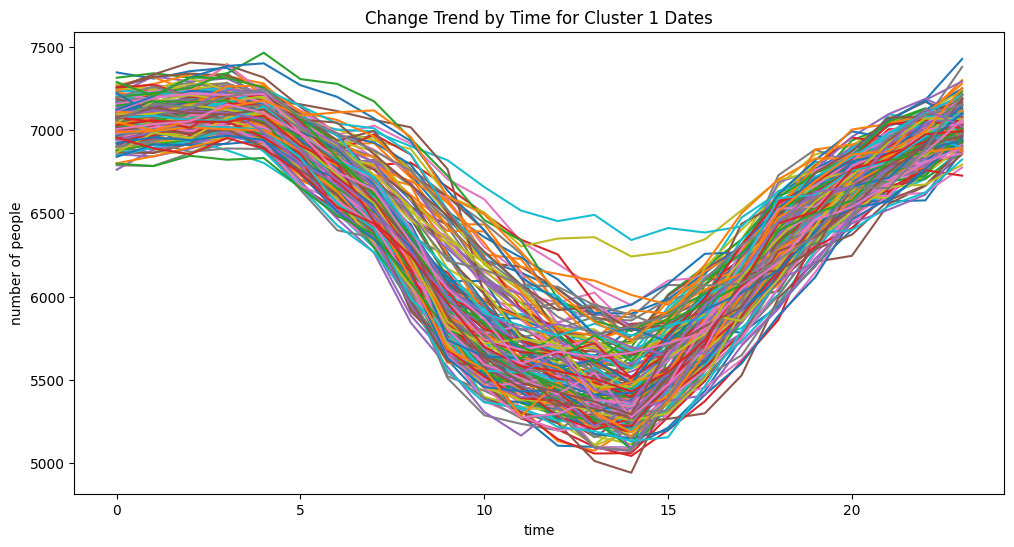

In [173]:
import matplotlib.pyplot as plt

# cluster1에 해당하는 날짜들 추출
cluster1_dates = cluster1['date']

# pivot_22_itw에서 cluster1에 해당하는 날짜들의 데이터 추출
cluster1_data = pivot_22_itw.loc[cluster1_dates]

# 그래프 그리기
fig, ax = plt.subplots(figsize=(12, 6))

for date, data in cluster1_data.iterrows():
    change_trend = data.values
    ax.plot(time_range, change_trend, label=date)

ax.set_xlabel('time')
ax.set_ylabel('number of people')
ax.set_title('Change Trend by Time for Cluster 1 Dates')
plt.show()

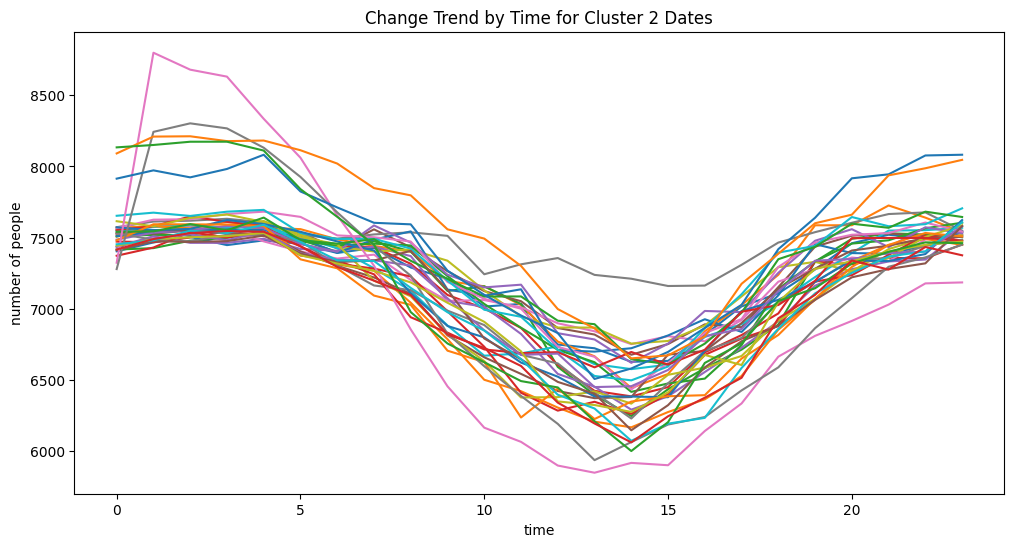

In [174]:
import matplotlib.pyplot as plt

# cluster2에 해당하는 날짜들 추출
cluster2_dates = cluster2['date']

# pivot_22_itw에서 cluster2에 해당하는 날짜들의 데이터 추출
cluster2_data = pivot_22_itw.loc[cluster2_dates]

# 그래프 그리기
fig, ax = plt.subplots(figsize=(12, 6))

for date, data in cluster2_data.iterrows():
    change_trend = data.values
    ax.plot(time_range, change_trend, label=date)

ax.set_xlabel('time')
ax.set_ylabel('number of people')
ax.set_title('Change Trend by Time for Cluster 2 Dates')
plt.show()

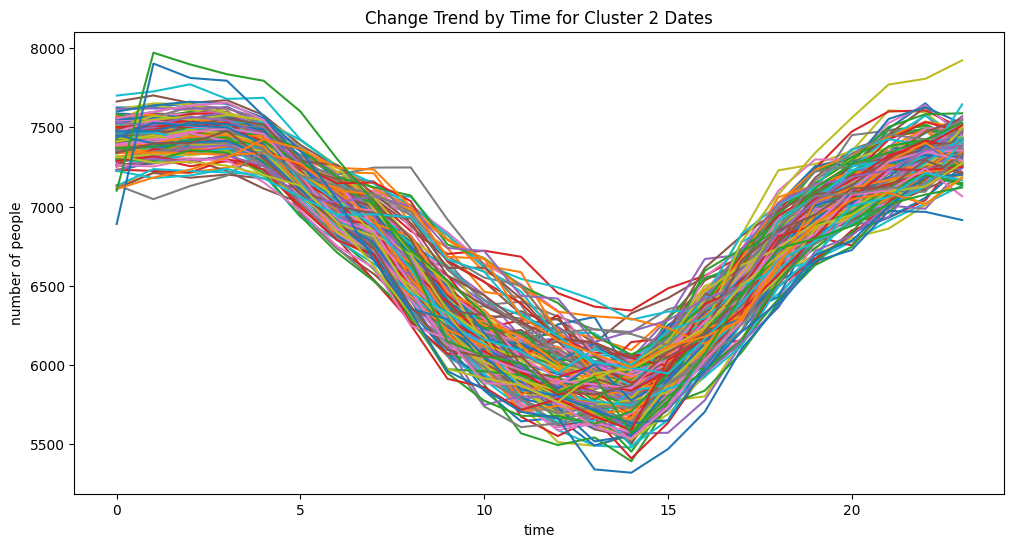

In [175]:
import matplotlib.pyplot as plt

# cluster3에 해당하는 날짜들 추출
cluster3_dates = cluster3['date']

# pivot_22_itw에서 cluster3에 해당하는 날짜들의 데이터 추출
cluster3_data = pivot_22_itw.loc[cluster3_dates]

# 그래프 그리기
fig, ax = plt.subplots(figsize=(12, 6))

for date, data in cluster3_data.iterrows():
    change_trend = data.values
    ax.plot(time_range, change_trend, label=date)

ax.set_xlabel('time')
ax.set_ylabel('number of people')
ax.set_title('Change Trend by Time for Cluster 2 Dates')
plt.show()

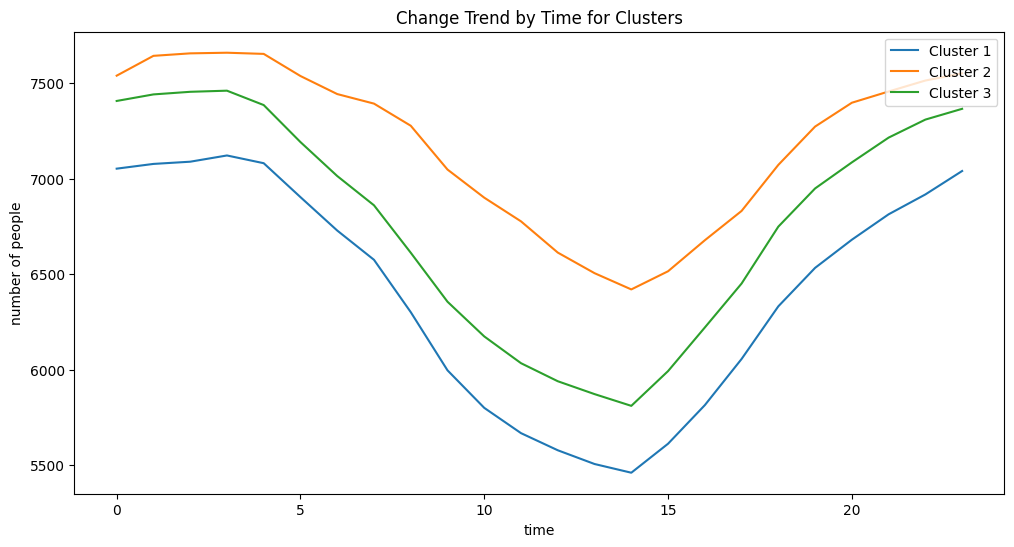

In [176]:
import matplotlib.pyplot as plt

time_range = range(24)

#cluster1부터 5까지의 데이터와 날짜들 추출
clusters = [cluster1, cluster2, cluster3]
cluster_labels = ['Cluster 1', 'Cluster 2', 'Cluster 3']
cluster_dates = [cluster['date'] for cluster in clusters]
cluster_data = [pivot_22_itw.loc[dates] for dates in cluster_dates]

#그래프 그리기
fig, ax = plt.subplots(figsize=(12, 6))

for label, data in zip(cluster_labels, cluster_data):
  change_trend = data.mean()
  ax.plot(time_range, change_trend, label=label)

ax.set_xlabel('time')
ax.set_ylabel('number of people')
ax.set_title('Change Trend by Time for Clusters')
ax.legend(loc='upper right')
plt.show()

In [177]:
pd.DataFrame(cluster1['date']) #일요일, 명절, 공휴일 등

,date
95,20220406
97,20220408
104,20220415
108,20220419
109,20220420
...,...
360,20221227
361,20221228
362,20221229
363,20221230


In [178]:
pd.DataFrame(cluster2['date'])

,date
0,20220101
1,20220102
8,20220109
15,20220116
22,20220123
29,20220130
30,20220131
31,20220201
32,20220202
35,20220205


In [179]:
pd.DataFrame(cluster3['date'])

,date
2,20220103
3,20220104
4,20220105
5,20220106
6,20220107
...,...
247,20220905
254,20220912
311,20221108
351,20221218


In [180]:
data_22_gr_

,기준일ID,시간대구분,행정동코드,총생활인구수,남자0세부터9세생활인구수,남자10세부터14세생활인구수,남자15세부터19세생활인구수,남자20세부터24세생활인구수,남자25세부터29세생활인구수,남자30세부터34세생활인구수,...,여자25세부터29세생활인구수,여자30세부터34세생활인구수,여자35세부터39세생활인구수,여자40세부터44세생활인구수,여자45세부터49세생활인구수,여자50세부터54세생활인구수,여자55세부터59세생활인구수,여자60세부터64세생활인구수,여자65세부터69세생활인구수,여자70세이상생활인구수
181,20220101,0,11305534,26376.5654,971.2295,553.0482,783.7787,646.3068,837.9474,766.2130,...,767.2774,753.4954,1004.4702,850.2644,1125.9659,1017.6607,1073.0177,1019.3979,882.5987,2390.0174
715,20220101,1,11305534,26565.5703,931.6154,530.4904,775.1630,690.7418,866.8357,791.7829,...,782.8948,772.0018,1007.7768,865.8281,1119.8135,1027.8130,1063.0841,1023.9640,890.8275,2412.0715
1042,20220101,2,11305534,26646.0019,905.8701,515.8306,788.5568,693.3305,847.7291,773.6407,...,814.3428,767.9373,1011.3802,868.8132,1143.7389,1045.1490,1068.1117,1035.8938,898.3372,2420.3741
1516,20220101,3,11305534,26638.0253,917.7851,522.6148,806.5595,721.1989,830.7997,788.7365,...,807.9991,789.5530,1013.5422,852.1869,1114.5477,1042.9930,1077.9625,1023.3577,906.1776,2384.4582
2072,20220101,4,11305534,26699.0762,899.0139,511.9261,796.5885,720.6091,831.5172,791.7984,...,827.7949,763.5632,1014.5176,858.5925,1136.5537,1049.0288,1088.8755,1019.0124,902.0572,2401.7544
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3712440,20221231,19,11305534,22120.9898,696.2717,396.4786,691.7358,610.6877,703.4462,548.1970,...,585.0563,629.1548,836.4122,698.2238,943.2793,887.2109,919.8871,860.6022,694.4547,2149.3405
3712624,20221231,20,11305534,23144.8680,750.9278,427.6012,759.0716,613.8029,687.0433,611.9281,...,609.5238,683.7193,854.6705,744.8570,979.9450,900.1440,963.4154,916.3193,730.4062,2217.2230
3713076,20221231,21,11305534,23431.1878,753.3369,428.9730,709.6839,651.9594,694.3556,614.3260,...,699.9538,666.4126,847.5648,798.4049,957.8578,942.4062,982.8375,860.8145,737.2696,2230.1350
3713757,20221231,22,11305534,24603.9131,892.5078,508.2215,688.5531,667.4235,733.0263,626.4515,...,737.4383,703.8903,863.4124,848.8208,989.2553,1012.7325,1075.7684,930.2106,755.9193,2332.7851


In [181]:
data_22_gr.columns

Index(['기준일ID', '시간대구분', '여자60세부터64세생활인구수', '여자65세부터69세생활인구수',
       '남자60세부터64세생활인구수', '남자65세부터69세생활인구수', '남자70세이상생활인구수', '여자70세이상생활인구수',
       '60세이상생활인구수'],
      dtype='object')

In [182]:
data_22_gr

,기준일ID,시간대구분,여자60세부터64세생활인구수,여자65세부터69세생활인구수,남자60세부터64세생활인구수,남자65세부터69세생활인구수,남자70세이상생활인구수,여자70세이상생활인구수,60세이상생활인구수
181,20220101,0,1019.3979,882.5987,821.7724,674.7189,1614.8562,2390.0174,7403.3615
715,20220101,1,1023.9640,890.8275,820.1542,693.3373,1625.1987,2412.0715,7465.5532
1042,20220101,2,1035.8938,898.3372,851.6411,674.9150,1622.9219,2420.3741,7504.0831
1516,20220101,3,1023.3577,906.1776,836.9646,672.3893,1623.3679,2384.4582,7446.7153
2072,20220101,4,1019.0124,902.0572,850.1165,661.1902,1645.9092,2401.7544,7480.0399
...,...,...,...,...,...,...,...,...,...
3712440,20221231,19,860.6022,694.4547,710.3917,503.3666,1449.4772,2149.3405,6367.6329
3712624,20221231,20,916.3193,730.4062,751.0952,546.4325,1494.8944,2217.2230,6656.3706
3713076,20221231,21,860.8145,737.2696,744.2831,553.5109,1524.6301,2230.1350,6650.6432
3713757,20221231,22,930.2106,755.9193,800.6409,548.5176,1519.3993,2332.7851,6887.4728


In [183]:
pivot_22_gr2 = data_22_gr.pivot(index='시간대구분', columns='기준일ID', values='60세이상생활인구수')


In [184]:
pivot_22_gr2

기준일ID,20220101,20220102,20220103,20220104,20220105,20220106,20220107,20220108,20220109,20220110,...,20221222,20221223,20221224,20221225,20221226,20221227,20221228,20221229,20221230,20221231
시간대구분,,,,,,,,,,,,,,,,,,,,,
0,7403.3615,7526.6104,7587.5120,7488.3141,7369.1145,7426.4315,7449.4521,7396.4245,7510.2116,7497.3301,...,7094.3503,7072.1407,7120.8908,7045.9556,7287.6079,7074.5759,7075.2177,7071.0771,7004.7283,7058.3437
1,7465.5532,7529.7765,7577.8838,7506.0463,7417.3898,7467.4764,7405.3116,7402.6446,7518.5869,7519.8355,...,7095.6224,7085.5461,7201.8258,6998.2445,7204.2188,7050.1329,7117.2857,7132.8108,7035.2765,7155.1941
2,7504.0831,7552.8606,7557.8864,7512.1805,7407.7466,7411.5964,7369.5760,7415.5013,7517.5306,7519.0308,...,7149.0023,7057.2870,7315.0310,7056.3877,7313.9867,7051.4513,7108.5238,7101.2608,7051.9931,7135.5227
3,7446.7153,7537.6773,7554.1953,7519.4663,7437.6648,7446.2774,7414.5679,7383.8035,7564.7872,7439.7478,...,7121.4908,7056.4253,7383.7372,7137.3625,7311.4361,7048.6723,7102.2438,7093.5630,7153.2948,7196.6797
4,7480.0399,7568.9470,7461.5143,7453.0571,7310.7816,7347.3117,7385.5951,7381.6777,7535.5266,7374.6320,...,7085.3004,7140.4336,7399.5871,7176.5211,7254.5745,7085.9371,7062.7186,7122.3619,7102.0068,7246.3473
5,7456.0350,7558.9604,7287.5332,7263.2811,7198.4611,7225.7070,7191.3170,7272.7334,7484.0533,7209.9102,...,6910.0478,6964.0882,7268.6365,7086.0225,7066.4697,6905.6319,6874.5843,6965.0778,6977.0048,7076.3250
6,7391.5397,7487.0044,7070.7249,7184.7458,6952.7939,7036.0128,7084.0070,7193.1683,7398.7467,7065.9116,...,6732.7631,6814.7651,7198.3450,7105.5171,6833.3399,6797.5004,6700.4303,6803.9822,6745.8727,6978.2772
7,7427.6233,7441.6820,6883.6056,7036.0897,6739.6403,6915.1663,6972.2858,7053.2842,7474.0303,6976.8622,...,6560.4231,6717.9157,7069.1978,7117.3403,6612.5239,6449.8150,6526.4939,6580.1249,6642.1861,6875.4758
8,7289.4894,7399.7496,6572.6264,6682.7289,6617.4114,6589.5525,6601.3387,6880.3933,7402.4473,6708.1570,...,6235.1442,6388.7391,6933.4628,6958.1845,6360.9369,6244.1256,6267.6329,6318.2660,6327.7522,6755.7143


In [185]:
date_3 = cluster1['date']

clu3_date = pivot_22_gr2[pivot_22_gr2.iloc[:, 0:].isin(pivot_22_gr2[date_3])]
clu3_date = clu3_date.dropna(axis=1) 
max_values2 = clu3_date.max()
max_indices2= clu3_date.idxmax()
result = pd.DataFrame({'생황인구 최댓값': max_values2, '시간': max_indices2})
Clu3_mean = result['시간'].mean()
Clu3_mean

5.308988764044944